<H1>CLASSIFICAÇÃO</H1>

Accuracy: 0.9999546310369076
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76274
         1.0       1.00      1.00      1.00    100058

    accuracy                           1.00    176332
   macro avg       1.00      1.00      1.00    176332
weighted avg       1.00      1.00      1.00    176332



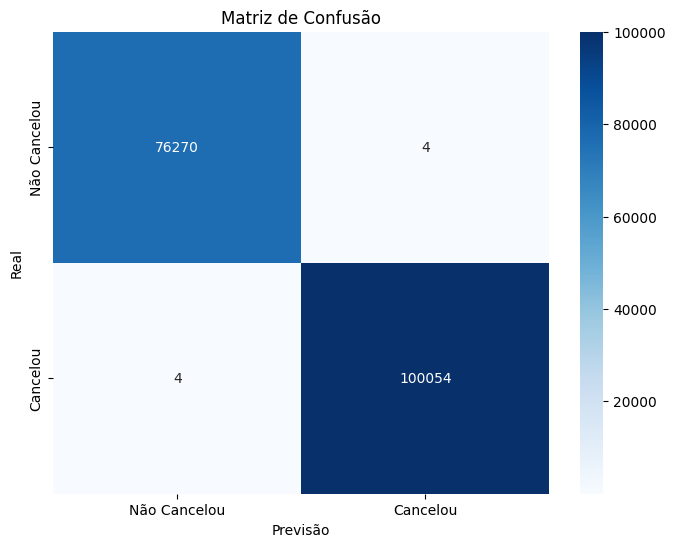

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
data = pd.read_csv('cancelamentos.csv')

# Tratamento de valores ausentes
data.dropna(inplace=True)

# Dividir os dados em variáveis independentes e dependentes
X = data.drop('cancelou', axis=1)
y = data['cancelou']

# Codificar variáveis categóricas
X = pd.get_dummies(X)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Criar matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Cancelou', 'Cancelou'], yticklabels=['Não Cancelou', 'Cancelou'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


Este código está gerando um gráfico de uma matriz de confusão. Uma matriz de confusão é uma tabela que é frequentemente usada para descrever o desempenho de um modelo de classificação em um conjunto de dados para os quais os valores verdadeiros são conhecidos.

No gráfico, as classes reais estão no eixo Y e as classes previstas estão no eixo X. Cada célula na matriz corresponde ao número de previsões feitas pelo modelo de aprendizado de máquina. 

Aqui está o que cada célula representa:

- Verdadeiros Positivos (TP): O modelo previu corretamente que o cliente cancelou.
- Verdadeiros Negativos (TN): O modelo previu corretamente que o cliente não cancelou.
- Falsos Positivos (FP): O modelo previu incorretamente que o cliente cancelou.
- Falsos Negativos (FN): O modelo previu incorretamente que o cliente não cancelou.

A diagonal principal (da esquerda superior para a direita inferior) mostra as previsões corretas, enquanto a outra diagonal (da esquerda inferior para a direita superior) mostra as previsões incorretas.

O gráfico é colorido para facilitar a visualização, com cores mais escuras indicando valores maiores. As células também são anotadas com os valores numéricos correspondentes.

<H1>CLUSTERIZAÇÃO</H1>

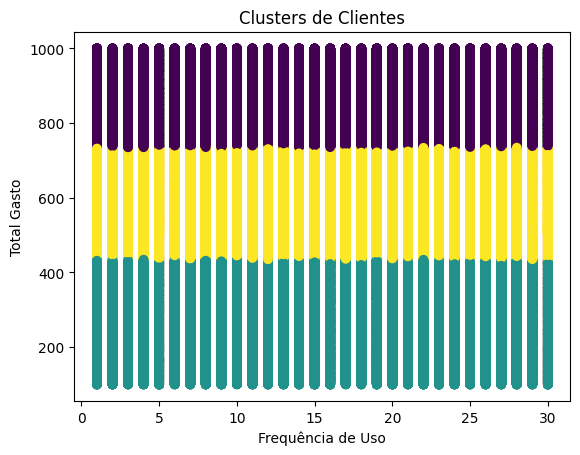

In [44]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Carregar dados
data = pd.read_csv('cancelamentos.csv')

# Lidar com valores nulos (NaN)
data.dropna(inplace=True)

# Selecionar recursos relevantes
X = data[['frequencia_uso', 'total_gasto']]

# Aplicar KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Adicionar rótulos de cluster aos dados
data['cluster'] = kmeans.labels_

# Visualizar clusters
plt.scatter(data['frequencia_uso'], data['total_gasto'], c=data['cluster'], cmap='viridis')
plt.xlabel('Frequência de Uso')
plt.ylabel('Total Gasto')
plt.title('Clusters de Clientes')
plt.show()


Este código está realizando uma análise de clusterização em um conjunto de dados de cancelamentos de clientes. Aqui está o que cada parte do código faz:

1. Importa as bibliotecas necessárias.

2. Carrega os dados de um arquivo CSV chamado 'cancelamentos.csv'.

3. Remove todas as linhas que contêm valores ausentes com o método `dropna()`.

4. Seleciona duas colunas do conjunto de dados: 'frequencia_uso' e 'total_gasto'.

5. Aplica o algoritmo K-Means aos dados selecionados, especificando que três clusters devem ser criados.

6. Adiciona os rótulos de cluster ao DataFrame original.

7. Cria um gráfico de dispersão dos dados, colorindo os pontos de acordo com o cluster ao qual pertencem.

O gráfico gerado mostra os clientes agrupados em três clusters com base em sua 'frequencia_uso' e 'total_gasto'. Cada ponto no gráfico representa um cliente, e a cor do ponto indica a qual cluster o cliente pertence. O eixo x representa a 'frequencia_uso' e o eixo y representa o 'total_gasto'. Isso pode ajudar a identificar padrões nos dados, como se clientes com uma certa frequência de uso tendem a gastar mais ou menos.

<h1>ASSOCIAÇÃO</h1>

/var/folders/4_/6l3x1_n903z4xcr63s8l611m0000gn/T/ipykernel_40694/1487872783.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_bin = data[item_columns].applymap(lambda x: 1 if x > 0 else 0)


   frequencia_uso  ligacoes_callcenter  dias_atraso  total_gasto
0               1                    1            1            1
1               1                    1            1            1
2               1                    1            1            1
3               1                    1            1            1
4               1                    1            1            1
                                          antecedents  \
0                               (ligacoes_callcenter)   
1                                    (frequencia_uso)   
2                                       (dias_atraso)   
3                                    (frequencia_uso)   
4                                       (total_gasto)   
5                                    (frequencia_uso)   
6                               (ligacoes_callcenter)   
7                                       (dias_atraso)   
8                               (ligacoes_callcenter)   
9                                       

/Users/gabriel/Documents/REPOSITORIO/faculade - ADS/P2/CIENCIA_DE_DADOS/PROJETOS/.venv/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


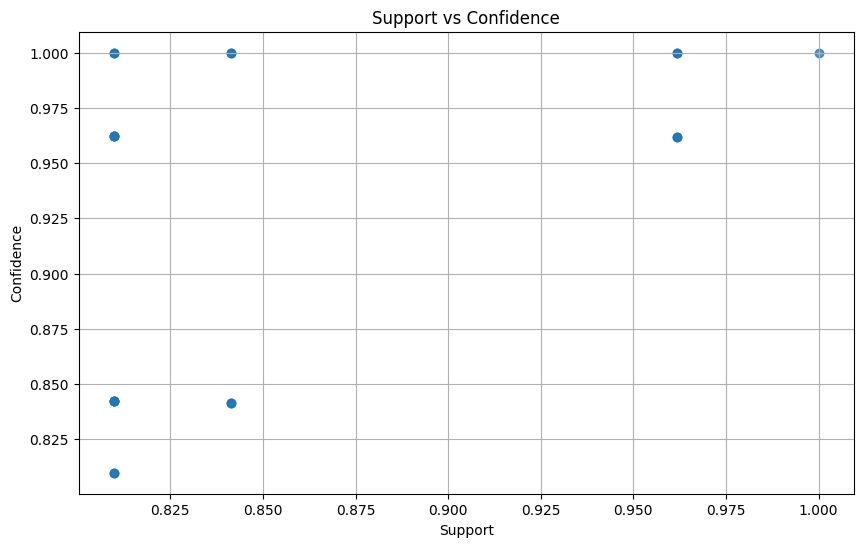

In [43]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv('cancelamentos.csv')

# Tratamento de valores ausentes
data.dropna(inplace=True)

# Assumindo que os itens estão em colunas específicas
# Vamos binarizar os dados: qualquer valor maior que 0 será convertido para 1
item_columns = ['frequencia_uso', 'ligacoes_callcenter', 'dias_atraso', 'total_gasto']
data_bin = data[item_columns].applymap(lambda x: 1 if x > 0 else 0)

# Verificar se os dados foram binarizados corretamente
print(data_bin.head())

# Aplicar o algoritmo Apriori para encontrar conjuntos de itens frequentes
frequent_itemsets = apriori(data_bin, min_support=0.05, use_colnames=True)

# Gerar regras de associação
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Verificar se há regras geradas
print(rules)

# Visualizar as regras de associação
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.grid(True)
plt.show()


Este código está usando a análise de regras de associação, que é uma técnica de mineração de dados para descobrir relações interessantes entre variáveis em grandes bancos de dados.

1. Primeiro, o código carrega um conjunto de dados de um arquivo CSV chamado 'cancelamentos.csv'.

2. Em seguida, ele remove todas as linhas que contêm valores ausentes com o método `dropna()`.

3. O código então seleciona algumas colunas específicas do conjunto de dados e binariza os valores nessas colunas. Isso significa que qualquer valor maior que 0 é convertido para 1, e qualquer valor igual a 0 permanece como 0. Isso é feito para preparar os dados para a análise de regras de associação, que requer dados binários.

4. O algoritmo Apriori é então aplicado aos dados binarizados para encontrar conjuntos de itens frequentes. O parâmetro `min_support` é usado para especificar o suporte mínimo dos conjuntos de itens que o algoritmo deve encontrar.

5. Depois que os conjuntos de itens frequentes são encontrados, o código gera regras de associação a partir desses conjuntos. As regras de associação são relações entre conjuntos de itens que ocorrem juntos com frequência no conjunto de dados.

6. Finalmente, o código gera um gráfico de dispersão das regras de associação, com o suporte no eixo x e a confiança no eixo y. Cada ponto no gráfico representa uma regra de associação. O suporte é a proporção de transações no conjunto de dados que contêm o conjunto de itens. A confiança é a proporção de transações com o conjunto de itens X que também contêm o conjunto de itens Y.

O gráfico gerado permite visualizar a relação entre o suporte e a confiança das regras de associação. Regras com maior suporte e confiança são geralmente mais interessantes porque indicam que os itens ocorrem juntos com frequência.

<H1>REGRESSÃO</H1>

Mean Squared Error: 3.6805622898217744e-25
R-squared: 1.0


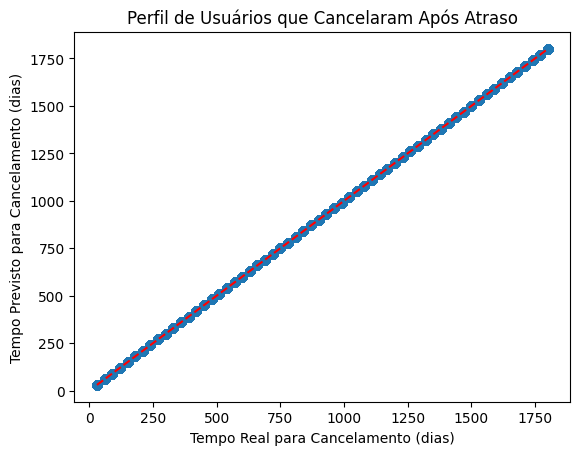

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv('cancelamentos.csv')

# Tratamento de valores ausentes
data.dropna(inplace=True)

# Filtrar apenas os clientes que cancelaram após ficar em atraso
data_cancelamento_apos_atraso = data[data['cancelou'] == 1]

# Definir as características (features) e o alvo (target)
X = data_cancelamento_apos_atraso[['idade', 'tempo_como_cliente', 'dias_atraso']]
y = data_cancelamento_apos_atraso['tempo_como_cliente']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Converter tempo de meses para dias
y_test_dias = y_test * 30
y_pred_dias = y_pred * 30

# Avaliar o modelo
print("Mean Squared Error:", mean_squared_error(y_test_dias, y_pred_dias))
print("R-squared:", r2_score(y_test_dias, y_pred_dias))

# Traçar um perfil de usuário que cancelou após ficar em atraso
plt.scatter(y_test_dias, y_pred_dias)
plt.plot([y_test_dias.min(), y_test_dias.max()], [y_test_dias.min(), y_test_dias.max()], color='red', linestyle='--')
plt.xlabel('Tempo Real para Cancelamento (dias)')
plt.ylabel('Tempo Previsto para Cancelamento (dias)')
plt.title('Perfil de Usuários que Cancelaram Após Atraso')
plt.show()


Este código está construindo um modelo de regressão linear para prever o tempo que um cliente levará para cancelar após ficar em atraso, com base em três características: idade, tempo como cliente e dias de atraso.

Aqui está o que cada parte do código faz:

1. Importa as bibliotecas necessárias.
2. Carrega um conjunto de dados de um arquivo CSV.
3. Remove quaisquer linhas com valores ausentes.
4. Filtra o conjunto de dados para incluir apenas os clientes que cancelaram após ficar em atraso.
5. Define as características (idade, tempo como cliente, dias de atraso) e o alvo (tempo como cliente) para o modelo de regressão.
6. Divide o conjunto de dados em conjuntos de treinamento e teste.
7. Treina um modelo de regressão linear nos dados de treinamento.
8. Faz previsões no conjunto de teste.
9. Converte o tempo de meses para dias para ambos, valores reais e previstos.
10. Avalia o modelo calculando o erro quadrático médio e o coeficiente de determinação (R-quadrado) entre os valores reais e previstos.
11. Traça um gráfico de dispersão dos valores reais versus os valores previstos, juntamente com uma linha vermelha representando a correspondência perfeita entre os valores reais e previstos. Este gráfico ajuda a visualizar o desempenho do modelo.

O modelo de regressão linear é um modelo simples que assume uma relação linear entre as características e o alvo. Ele tenta encontrar a linha que melhor se ajusta aos dados de treinamento e, em seguida, usa essa linha para fazer previsões nos dados de teste.

<H1>NÃO SUPERVISIONADO</H1>

/Users/gabriel/Documents/REPOSITORIO/faculade - ADS/P2/CIENCIA_DE_DADOS/PROJETOS/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


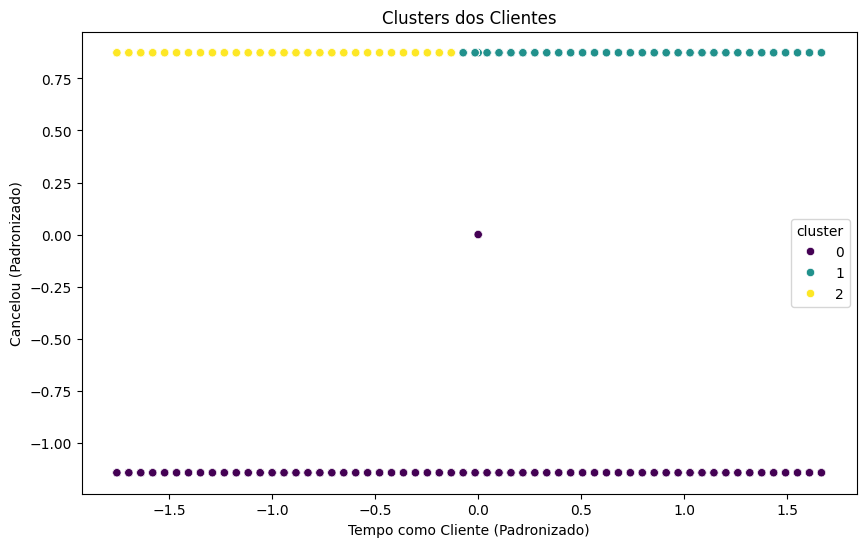

In [26]:
# Não supervisionado
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_csv('cancelamentos.csv')

# Selecionar colunas relevantes
features = ['tempo_como_cliente', 'cancelou']

# Verificar e converter colunas para numérico se necessário
df['cancelou'] = df['cancelou'].astype(float)

# Preencher valores ausentes nas colunas selecionadas
df[features] = df[features].fillna(df[features].mean())

# Padronizar os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Visualização (opcional)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df['cluster'], palette='viridis')
plt.title('Clusters dos Clientes')
plt.xlabel('Tempo como Cliente (Padronizado)')
plt.ylabel('Cancelou (Padronizado)')
plt.show()

# Salvar resultados
df.to_csv('resultados_clusterizacao.csv', index=False)

Este código está realizando uma análise de clusterização não supervisionada em um conjunto de dados de cancelamentos de clientes. Aqui está o que cada parte do código faz:

1. Importa as bibliotecas necessárias.

2. Carrega os dados de um arquivo CSV chamado 'cancelamentos.csv'.

3. Seleciona duas colunas do conjunto de dados: 'tempo_como_cliente' e 'cancelou'.

4. Converte a coluna 'cancelou' para um tipo de dados float.

5. Preenche quaisquer valores ausentes nas colunas selecionadas com a média dos valores existentes nessas colunas.

6. Padroniza os dados usando a classe `StandardScaler` do scikit-learn. Isso é feito para garantir que todas as características tenham a mesma escala e, portanto, a mesma importância no algoritmo de clusterização.

7. Aplica o algoritmo K-Means aos dados padronizados, especificando que três clusters devem ser criados.

8. Adiciona os rótulos de cluster ao DataFrame original.

9. Cria um gráfico de dispersão dos dados, colorindo os pontos de acordo com o cluster ao qual pertencem.

10. Salva o DataFrame com os rótulos de cluster em um novo arquivo CSV.

O gráfico gerado mostra os clientes agrupados em três clusters com base em seu 'tempo_como_cliente' e se 'cancelou' ou não. Cada ponto no gráfico representa um cliente, e a cor do ponto indica a qual cluster o cliente pertence. O eixo x representa o 'tempo_como_cliente' e o eixo y representa se o cliente 'cancelou' ou não, ambos padronizados. Isso pode ajudar a identificar padrões nos dados, como se clientes com um certo tempo como cliente são mais propensos a cancelar.